In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [10]:
review_json_path = 'Books_5.json'

size = 10000000
review = pd.read_json(review_json_path, lines=True,
                      chunksize=size)



In [11]:
for chunk_review in review:
    sample_list = pd.DataFrame(chunk_review[['reviewerID','asin','overall']])
    
    print('run')


run


KeyboardInterrupt: 

In [12]:
chunk_review.sample(30)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
5359062,5,True,"01 14, 2013",A1NZJX25M7EC4T,0375868267,{'Format:': ' Hardcover'},Carol S.,These books are fabulous! Start reading these...,Granddaughter loves these book!!!,1358121600,NaN,NaN
9432752,5,False,"06 1, 2009",A2M8CZM0G7WQ9T,0764206745,{'Format:': ' Hardcover'},Lynda Schab,Turn on the news today and you may get discour...,An Inspiring and Soul Stirring Read!,1243814400,2,NaN
5718642,1,False,"04 17, 2007",A2D37EP9KT2E3D,0393004708,{'Format:': ' Paperback'},Mark bennett,This was a rotten book when it was first writt...,worthless and not what the title suggests,1176768000,24,NaN
3514961,1,False,"09 1, 2005",A3987YLNFZ2CBC,0310205719,{'Format:': ' Hardcover'},Andreas Kristanto,"M y church, just like a lot of of others, join...",Please Be Carefull,1125532800,16,NaN
8275609,5,True,"12 27, 2011",A1V73K4V5FSI5N,0671023195,{'Format:': ' Kindle Edition'},Drew Clark,I could not put this book down....very very go...,Awesome,1324944000,NaN,NaN
8502272,5,False,"01 10, 2017",ATY16XT8HDLH2,0692280219,{'Format:': ' Kindle Edition'},Dixie,"This book had a good flow, made me want to kee...",Great book!,1484006400,NaN,NaN
2760380,5,True,"11 16, 2016",AV5UC2HH02L7I,015206396X,{'Format:': ' Kindle Edition'},Kindle Customer,Book 1 was really good - have read the whole s...,Five Stars,1479254400,NaN,NaN
5635605,4,False,"07 16, 2012",A35V32HZEGZH04,0385535481,{'Format:': ' Hardcover'},Opa Wayne,.\n\nVeteran French Inspector Paul Mazarelle d...,Murder Chess,1342396800,2,NaN
2049858,3,True,"04 23, 2016",A10PF4RS2YKVSI,0140280197,{'Format:': ' Paperback'},William T. Sprankel,I am not sure how accurate this book is as; I ...,I am not sure how accurate this book is as ...,1461369600,2,NaN
6370363,5,True,"11 28, 2012",A2PAGCWQ2KWTKU,042526596X,{'Format:': ' Kindle Edition'},Never Enough to Read,I read the series when it first came out and h...,So good that I read both books twice,1354060800,NaN,NaN


In [13]:
chunk_review.dtypes


overall            int64
verified            bool
reviewTime        object
reviewerID        object
asin              object
style             object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
vote              object
image             object
dtype: object

In [15]:
reviews_ratings = chunk_review[['reviewerID','asin','reviewText','overall']]

reviews_ratings.head()

,reviewerID,asin,reviewText,overall
0,A1REUF3A1YCPHM,0001713353,"The King, the Mice and the Cheese by Nancy Gur...",5
1,AVP0HXC9FG790,0001713353,The kids loved it!,5
2,A324TTUBKTN73A,0001713353,My students (3 & 4 year olds) loved this book!...,5
3,A2RE7WG349NV5D,0001713353,LOVE IT,5
4,A32B7QIUDQCD0E,0001713353,Great!,5


In [16]:
book_count = (reviews_ratings.
     groupby(by = ['asin'])['overall'].
     count().
     reset_index()
    )


threshold = 50
book_count = book_count.query('overall >= @threshold')

book_count.head()

,asin,overall
3,000100039X,772
4,0001046314,368
7,0001047868,223
8,0001048767,3018
10,000105001X,114


In [17]:
user_rating = pd.merge(book_count, reviews_ratings, left_on='asin', right_on='asin', how='left')

user_count = (reviews_ratings.
     groupby(by = ['reviewerID'])['overall'].
     count().
     reset_index()
    )

threshold = 30
user_count = user_count.query('overall >= @threshold')

user_count.head()

,reviewerID,overall
29,A0099735VDZ3HDCAAYKL,32
50,A01433701FZ0LF5G2RUL,43
83,A0239227GJ5Z0VBDC180,37
439,A10074U9M272RL,57
451,A1008GFLTBL76H,34


In [18]:
combined = user_rating.merge(user_count, left_on = 'reviewerID', right_on = 'reviewerID', how = 'inner')

combined.head()

,asin,overall_x,reviewerID,reviewText,overall_y,overall
0,000100039X,772,A2UIILZDC35P15,This is a combination of a narrative poem and ...,5,135
1,0001048767,3018,A2UIILZDC35P15,King Ferdinand and three of his attending lord...,5,135
2,0001050230,2228,A2UIILZDC35P15,King Ferdinand and three of his attending lord...,5,135
3,0007107005,249,A2UIILZDC35P15,I recently reviewed the book Asana Pranayama M...,4,135
4,0007155662,4575,A2UIILZDC35P15,This is a short and simple book. Its premise c...,3,135


In [19]:
print('Number of unique books: ', combined['asin'].nunique())
print('Number of unique users: ', combined['reviewerID'].nunique())


Number of unique books:  37806
Number of unique users:  30665


In [20]:
combined_gb = combined.groupby(by = ['reviewerID','asin'],as_index=False).mean()

combined_final = combined_gb.drop(columns = ['overall_x','overall'])
combined_final = combined_final.rename(columns = {'reviewerID':'User-ID', 'asin': 'Book-ID', 'overall_y':'Rating'})
scaler = MinMaxScaler()
combined_final['Rating'] = combined_final['Rating'].values.astype(float)
rating_scaled = pd.DataFrame(scaler.fit_transform(combined_final['Rating'].values.reshape(-1,1)))
combined_final['Rating'] = rating_scaled

combined_final.head()

,User-ID,Book-ID,Rating
0,A0099735VDZ3HDCAAYKL,014752217X,1.0
1,A0099735VDZ3HDCAAYKL,031294232X,1.0
2,A0099735VDZ3HDCAAYKL,034553087X,1.0
3,A0099735VDZ3HDCAAYKL,0345532627,1.0
4,A0099735VDZ3HDCAAYKL,0349400199,1.0


In [24]:
combined_final.shape

(1614699, 3)

In [31]:
user_avg = combined_final.groupby(by = ['User-ID'])

user_avg_gb = user_avg.agg([np.mean,np.size])
user_avg_gb.sample(10)

Rating       
                    mean   size
User-ID                        
A33MAZZV2G2L70  0.667062  211.0
A2LSWDXVL19HI6  0.789773   44.0
A37A44LEGU3T45  0.958333   24.0
ALR80FZH49JPB   0.839744   39.0
A2RZ9O4PSL16V4  0.908140  215.0
AMCZLPIRP0QTE   0.820084  239.0
A3BOSZB811E6BN  0.835366   41.0
A28IAZZI0SNRMW  0.808989   89.0
A3L5QT81R8A9MC  0.961538   52.0
AO6U3C5QH8CON   0.393939   33.0

In [47]:
user_avg_gb = user_avg_gb['Rating']
user_avg_gb.head()

,mean,size
User-ID,,
A0099735VDZ3HDCAAYKL,1.000000,31.0
A01433701FZ0LF5G2RUL,0.921429,35.0
A0239227GJ5Z0VBDC180,0.993243,37.0
A10074U9M272RL,0.850000,50.0
A1008GFLTBL76H,0.808333,30.0


In [32]:
book_avg = combined_final.groupby(by = ['Book-ID'])

book_avg_gb = book_avg.agg([np.mean,np.size])
book_avg_gb.sample(10)

Rating      
                mean  size
Book-ID                   
0439706238  0.833333  33.0
0060179775  0.888889  18.0
038553891X  0.760417  96.0
0500277907  0.916667  12.0
0007410913  0.884615  26.0
0553575023  0.800000  35.0
0671521101  0.804688  32.0
0140430350  0.808594  64.0
0007217137  0.759615  26.0
0061930946  0.704545  11.0

In [38]:
book_avg_gb.columns


MultiIndex([('Rating', 'mean'),
            ('Rating', 'size')],
           )

In [41]:
book_avg_gb = book_avg_gb['Rating']
book_avg_gb.head()

,mean,size
Book-ID,,
000100039X,0.883621,87.0
0001046314,0.837500,40.0
0001047868,0.830189,53.0
0001048767,0.819577,376.0
000105001X,0.657407,27.0


In [42]:
book_avg_gb.sort_values(by = ['mean'],ascending = False)

,mean,size
Book-ID,,
0793545951,1.0,1.0
0443063516,1.0,1.0
0736083863,1.0,2.0
0060629304,1.0,4.0
0446563412,1.0,5.0
...,...,...
0692805303,0.0,1.0
0615927777,0.0,1.0
0062320327,0.0,1.0


In [46]:
bg_vc = book_avg_gb['size'].value_counts()
bg_vc.iloc[0:30]

18.0    844
15.0    823
12.0    819
16.0    811
10.0    801
20.0    799
9.0     798
8.0     797
17.0    795
5.0     795
14.0    792
13.0    777
11.0    767
7.0     767
19.0    761
21.0    751
22.0    740
6.0     733
23.0    703
4.0     699
25.0    676
24.0    664
26.0    631
3.0     609
27.0    604
29.0    594
28.0    592
30.0    570
32.0    525
31.0    523
Name: size, dtype: int64

In [21]:
combined = combined_final.drop_duplicates(['User-ID', 'Book-ID'])
user_book_matrix = combined.pivot(index='User-ID', columns='Book-ID', values='Rating')
user_book_matrix.fillna(0, inplace=True)
users = user_book_matrix.index.tolist()
books = user_book_matrix.columns.tolist()


In [22]:
user_book_matrix

Book-ID,000100039X,0001046314,0001047868,0001048767,000105001X,0001050230,0001052292,0001381733,0001384198,0001473727,...,0793508304,0793509440,0793515599,0793516471,0793518326,0793520312,0793525446,0793538491,0793542057,0793545951
User-ID,,,,,,,,,,,,,,,,,,,,,
A0099735VDZ3HDCAAYKL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01433701FZ0LF5G2RUL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0239227GJ5Z0VBDC180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10074U9M272RL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1008GFLTBL76H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZBRC15RZTQI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZCSTUZ5EO4I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZMO52V8WZ68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
combined_final['Rating'].value_counts()


1.000000    812404
0.750000    473119
0.500000    208028
0.250000     76073
0.000000     40014
             ...  
0.788462         1
0.956522         1
0.616667         1
0.291667         1
0.861111         1
Name: Rating, Length: 86, dtype: int64

In [8]:
reviews = pd.DataFrame(chunk_review['reviewText'])

In [9]:
reviews

,reviewText
0,"The King, the Mice and the Cheese by Nancy Gur..."
1,The kids loved it!
2,My students (3 & 4 year olds) loved this book!...
3,LOVE IT
4,Great!
...,...
999995,This series is one of the best romantic young ...
999996,"Things I liked:\n\n-Nice, easy, short read. Th..."
999997,Full Moon is the second book in the Dark Guar...
999998,Ransom my Heart is the first Meg Cabot book I ...


In [10]:
reviews.dtypes

reviewText    object
dtype: object

In [11]:
reviews.reviewText = reviews.reviewText.astype('str')

reviews

,reviewText
0,"The King, the Mice and the Cheese by Nancy Gur..."
1,The kids loved it!
2,My students (3 & 4 year olds) loved this book!...
3,LOVE IT
4,Great!
...,...
999995,This series is one of the best romantic young ...
999996,"Things I liked:\n\n-Nice, easy, short read. Th..."
999997,Full Moon is the second book in the Dark Guar...
999998,Ransom my Heart is the first Meg Cabot book I ...


In [12]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [13]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(reviews.reviewText.apply(round1))
data_clean

,reviewText
0,the king the mice and the cheese by nancy gurn...
1,the kids loved it
2,my students year olds loved this book defi...
3,love it
4,great
...,...
999995,this series is one of the best romantic young ...
999996,things i liked\n\nnice easy short read the lan...
999997,full moon is the second book in the dark guar...
999998,ransom my heart is the first meg cabot book i ...


In [14]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [15]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.reviewText.apply(round2))
data_clean

,reviewText
0,the king the mice and the cheese by nancy gurn...
1,the kids loved it
2,my students year olds loved this book defi...
3,love it
4,great
...,...
999995,this series is one of the best romantic young ...
999996,things i likednice easy short read the languag...
999997,full moon is the second book in the dark guar...
999998,ransom my heart is the first meg cabot book i ...


In [16]:
data_samp = data_clean.sample(n = 5000)
data_samp

,reviewText
659201,i read this novel because someone close to me ...
460007,conformity vs nonconformity plays a paramount ...
240063,summer reading for many highschool kids
420765,i was mesmerized and could not put it down
707947,ive picked up my fair share of mysteries throu...
...,...
915817,i love his story and admire jimmy connors for ...
209565,i ordered this when oprah mentioned it as part...
605036,i liked it but i got this with several other b...
145391,i read with shock angelas ashes i cheered up w...


In [17]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_samp.reviewText)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_samp.index
data_dtm

C:\Users\kenhu\anaconda3\envs\torch1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aah,aaron,ab,aback,abandon,abandoned,abandonedi,abandoning,...,zones,zooming,zora,zos,zot,zubrins,zucchini,zuckoff,zukav,zwingli
659201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
460007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
707947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
605036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
word_list = data_dtm.sum(axis = 0, skipna = True).sort_values(ascending = False)
word_list[0:20]

book          5849
read          2937
story         1818
like          1446
books         1341
good          1339
just          1285
great         1187
time          1097
love          1083
characters    1075
reading        987
really         953
life           913
series         810
way            765
people         738
novel          678
author         635
think          621
dtype: int64

In [19]:
word = pd.DataFrame(word_list[0:20])

word

,0
book,5849
read,2937
story,1818
like,1446
books,1341
good,1339
just,1285
great,1187
time,1097
love,1083


<AxesSubplot:ylabel='0'>

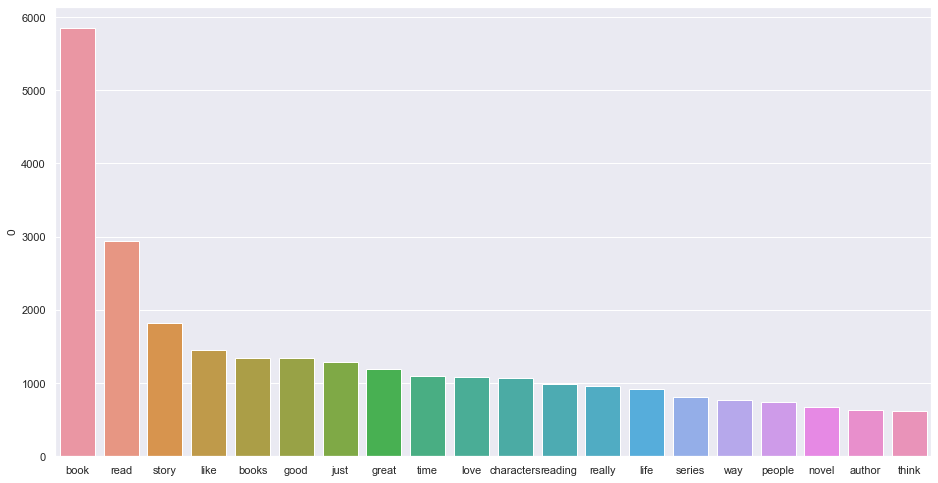

In [20]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.barplot(x = word.index, y = word[0])

Text(0.5, 1.0, 'disaster tweets')

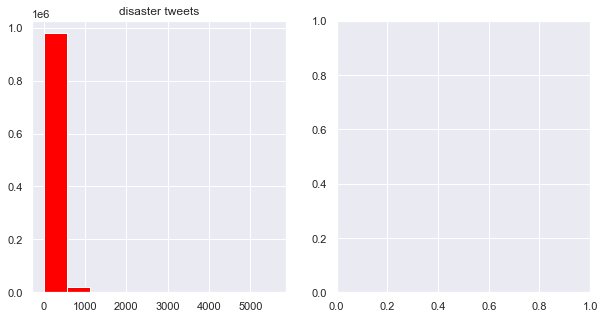

In [21]:
import matplotlib.pyplot as plt

data_len=data_clean['reviewText'].str.split().map(lambda x: len(x))


Text(0.5, 1.0, 'disaster tweets')

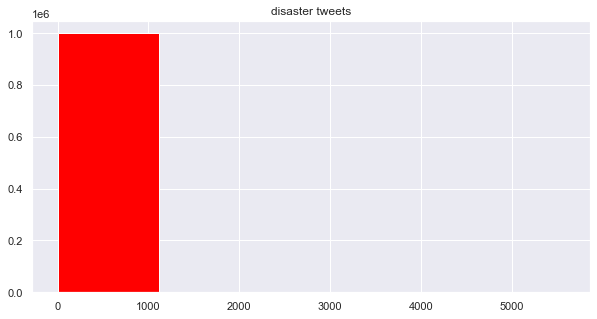

In [27]:
fig,(ax1)=plt.subplots(1,1,figsize=(10,5))

ax1.hist(data_len,color='red',bins = 5)
ax1.set_title('disaster tweets')


In [29]:
data_len

0         157
1           4
2          13
3           2
4           1
         ... 
999995     22
999996    375
999997     89
999998    924
999999    754
Name: reviewText, Length: 1000000, dtype: int64

In [30]:
data_len.max()

5582

In [40]:
data_len_above_20 = data_len[data_len > 100]

len(data_len_above_20)

277218

C:\Users\kenhu\anaconda3\envs\torch1\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\kenhu\anaconda3\envs\torch1\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\kenhu\anaconda3\envs\torch1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'disaster')

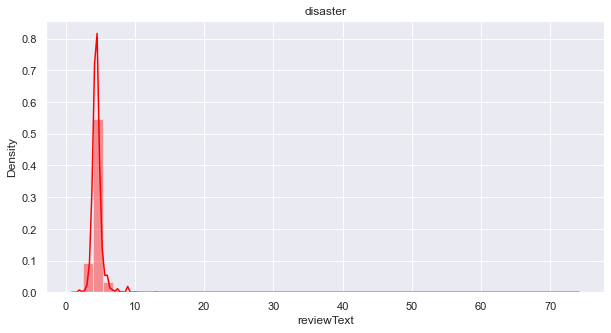

In [32]:
fig,(ax1)=plt.subplots(1,1,figsize=(10,5))
word=data_clean['reviewText'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')


In [35]:
word.mean()

KeyboardInterrupt: 

In [34]:
word[0]

[3,
 4,
 3,
 4,
 3,
 3,
 6,
 2,
 5,
 6,
 2,
 2,
 9,
 9,
 4,
 2,
 2,
 3,
 4,
 1,
 4,
 8,
 4,
 2,
 3,
 9,
 3,
 9,
 3,
 2,
 8,
 3,
 5,
 4,
 2,
 5,
 1,
 4,
 3,
 3,
 7,
 4,
 4,
 4,
 6,
 3,
 6,
 2,
 8,
 3,
 4,
 3,
 3,
 4,
 7,
 4,
 2,
 5,
 4,
 3,
 4,
 3,
 4,
 6,
 1,
 8,
 2,
 3,
 4,
 3,
 9,
 3,
 4,
 5,
 2,
 4,
 2,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 2,
 5,
 3,
 4,
 3,
 7,
 7,
 4,
 2,
 5,
 4,
 3,
 9,
 7,
 2,
 2,
 5,
 4,
 3,
 5,
 5,
 6,
 4,
 3,
 7,
 5,
 4,
 2,
 10,
 3,
 10,
 7,
 3,
 4,
 3,
 3,
 4,
 3,
 5,
 4,
 7,
 5,
 3,
 6,
 16,
 8,
 4,
 9,
 3,
 5,
 3,
 8,
 3,
 9,
 1,
 3,
 8,
 2,
 8,
 4,
 2,
 2,
 4,
 2,
 5,
 1,
 6,
 9,
 2,
 3,
 8,
 4,
 2]